In [0]:
#!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
ls -lh /content/gdrive/My\ Drive/nlp-data

total 398M
-rw------- 1 root root 146M Dec 18 02:04 data_lm_export_50000.pkl
-rw------- 1 root root 196M Dec 18 02:04 ft_enc_50000.pth
-rw------- 1 root root 565K Dec 17 21:46 labeled.tsv
-rw------- 1 root root  56M Dec 17 21:47 unlabeled.tsv


In [0]:
from fastai.text import *
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [0]:
def join_text(row):
    title, abstract = row.title, row.abstract
    return title + '\n' + abstract

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/nlp-data/unlabeled.tsv', sep='\t')
df['text'] = df.apply(join_text, axis=1)
df['label'] = 0.5
df = df[['label', 'text']]

#df = df.sample(n=5000)

In [8]:
df_trn, df_val = train_test_split(df, test_size=0.05)

df_trn.shape, df_val.shape

((48229, 2), (2539, 2))

In [9]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df=df_trn, valid_df=df_val, path="")

In [10]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-02
Min loss divided by 10: 1.74E-02
CPU times: user 12.5 s, sys: 8.14 s, total: 20.6 s
Wall time: 22 s


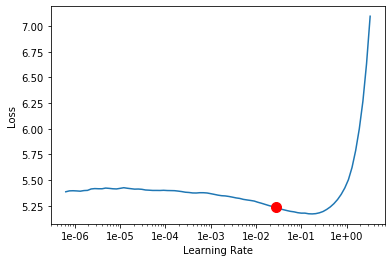

In [11]:
%%time
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

epoch,train_loss,valid_loss,accuracy,time
0,4.045741,3.841880,0.338901,07:54


epoch,train_loss,valid_loss,accuracy,time
0,3.602919,3.604133,0.360115,09:00
1,3.535178,3.507526,0.369769,09:01
2,3.396318,3.444750,0.377035,09:04
3,3.292541,3.407303,0.381773,09:04
4,3.148413,3.397498,0.383674,09:02
5,3.056642,3.404516,0.383341,09:04


CPU times: user 37min 35s, sys: 23min 34s, total: 1h 1min 9s
Wall time: 1h 2min 21s


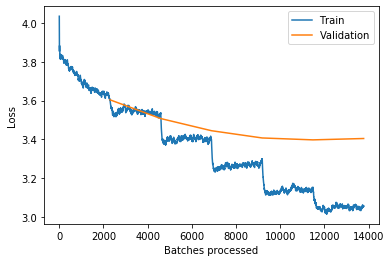

In [12]:
%%time
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)
learn.fit_one_cycle(1, min_grad_lr)
learn.unfreeze()
learn.fit_one_cycle(6, 1e-3)
learn.recorder.plot_losses()
learn.save_encoder('/content/gdrive/My Drive/nlp-data/ft_enc_50000')
data_lm.save('/content/gdrive/My Drive/nlp-data/data_lm_export_50000.pkl')

In [16]:
learn.predict("We used a deep neural network to", n_words=10)

'We used a deep neural network to detect anomalies in a planar parsing system \n  In'

In [17]:
df_trn, df_val = df_trn.sample(n=5000), df_val

df_trn.shape, df_val.shape

((5000, 2), (2539, 2))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-06
Min loss divided by 10: 7.59E-06
CPU times: user 14.6 s, sys: 9.16 s, total: 23.8 s
Wall time: 37.2 s


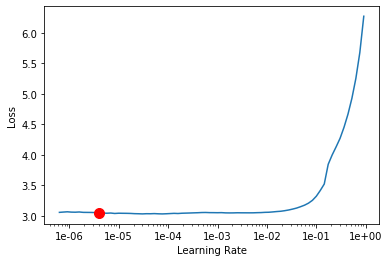

In [20]:
# Language model data
%%time
data_lm = TextLMDataBunch.from_df(train_df=df_trn, valid_df=df_val, path="")
learn.lr_find()
learn.recorder.plot(suggestion=True)
min_grad_lr = learn.recorder.min_grad_lr

epoch,train_loss,valid_loss,accuracy,time
0,5.258592,5.000141,0.264156,00:34


epoch,train_loss,valid_loss,accuracy,time
0,4.492157,4.181330,0.321321,00:41
1,4.066149,3.889491,0.339150,00:41
2,3.748819,3.772356,0.346157,00:41
3,3.451680,3.735404,0.348704,00:41
4,3.223161,3.742666,0.347699,00:41
5,3.075903,3.759073,0.346538,00:41


CPU times: user 3min 1s, sys: 1min 40s, total: 4min 41s
Wall time: 4min 46s


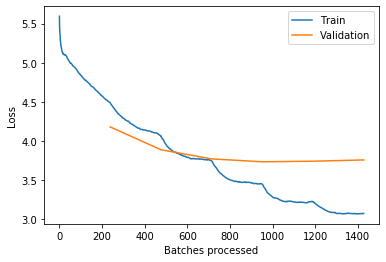

In [21]:
%%time
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)
learn.fit_one_cycle(1, min_grad_lr)
learn.unfreeze()
learn.fit_one_cycle(6, 1e-3)
learn.recorder.plot_losses()
learn.save_encoder('/content/gdrive/My Drive/nlp-data/ft_enc_5000')
data_lm.save('/content/gdrive/My Drive/nlp-data/data_lm_export_5000.pkl')

epoch,train_loss,valid_loss,accuracy,time
0,5.242276,5.000055,0.264135,00:34


epoch,train_loss,valid_loss,accuracy,time
0,4.399332,4.100438,0.325179,00:41
1,3.982200,3.851515,0.341269,00:41
2,3.659120,3.759422,0.348082,00:41
3,3.427556,3.754759,0.348155,00:41


CPU times: user 2min 8s, sys: 1min 11s, total: 3min 20s
Wall time: 3min 23s


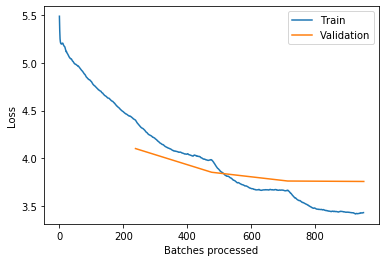

In [22]:
%%time
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)
learn.fit_one_cycle(1, min_grad_lr)
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.recorder.plot_losses()
learn.save_encoder('/content/gdrive/My Drive/nlp-data/ft_enc_5000a')
data_lm.save('/content/gdrive/My Drive/nlp-data/data_lm_export_5000a.pkl')